In [32]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
import numpy as np 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.densenet import DenseNet121
#from google.colab import drive #Google colab için
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
import warnings
warnings.filterwarnings('always')

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=(-0.0,-0.2))
])

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
BATCH_SIZE = 20
IMG_SIZE = (512, 512)
IMG_SHAPE = IMG_SIZE + (3,)

pretrained_model = VGG16(
 weights='imagenet',
 include_top=False ,
 input_shape=IMG_SHAPE
 )

pretrained_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1)
inputs = tf.keras.Input(shape=(512, 512, 3))
x = data_augmentation(inputs)
x = pretrained_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 512, 512, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 16, 16, 512)       14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_____________________________________________

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
train_normal_dir=os.path.join('./data/train/normal')
train_PNEUMONIA_dir=os.path.join('./data/train/anormal')
test_normal_dir=os.path.join('./data/test/normal')
test_PNEUMONIA_dir=os.path.join('./data/test/anormal')
val_normal_dir=os.path.join('./data/val/normal')
val_PNEUMONIA_dir=os.path.join('./data/val/anormal')

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


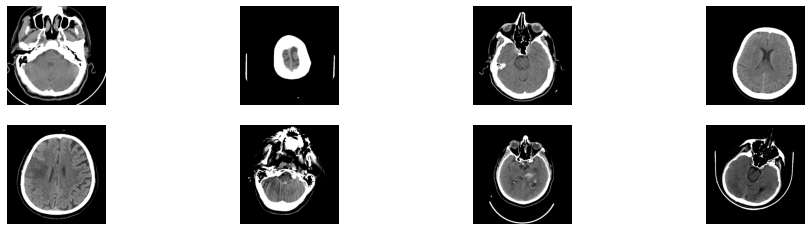

In [37]:
nrows=2
ncols=4

pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*2)

pic_index+=4

next_normal_pix = [os.path.join(train_normal_dir,fname) for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
next_pne_pix = [os.path.join(train_PNEUMONIA_dir,fname) for fname in os.listdir(train_PNEUMONIA_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(next_normal_pix+next_pne_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [38]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

BATCH_SIZE = 20
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator=train_datagen.flow_from_directory(
      './data/train/',
      target_size=(512,512),
      batch_size=BATCH_SIZE,
      class_mode='binary'
)
train_dataset = image_dataset_from_directory('./data/train/',
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=(512,512))


test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=train_datagen.flow_from_directory(
      './data/test/',
      target_size=(512,512),
      batch_size=BATCH_SIZE,
      class_mode='binary',
      shuffle=True
)
test_dataset = image_dataset_from_directory('./data/test/',
                                             shuffle=False,
                                             batch_size=BATCH_SIZE,
                                             image_size=(512,512))

val_datagen=ImageDataGenerator(rescale=1./255)
val_generator=train_datagen.flow_from_directory(
      './data/val/',
      target_size=(512,512),
      batch_size=BATCH_SIZE,
      class_mode='binary'
)
validation_dataset = image_dataset_from_directory('./data/val/',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=(512,512))


c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Found 6356 images belonging to 2 classes.
Found 6356 files belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 140 files belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 140 files belonging to 2 classes.


c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


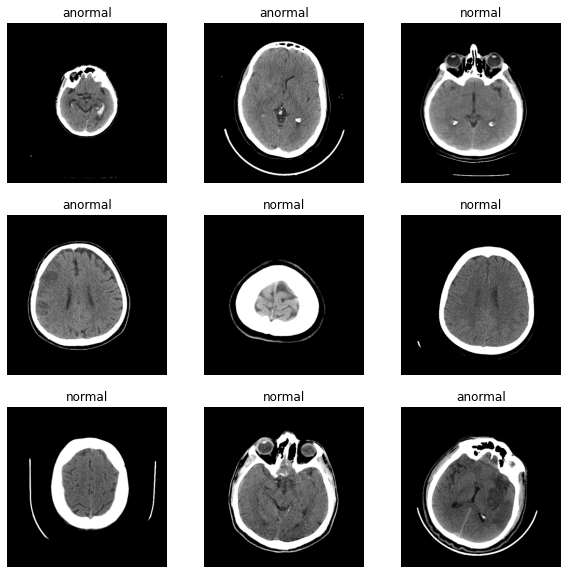

In [39]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [40]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


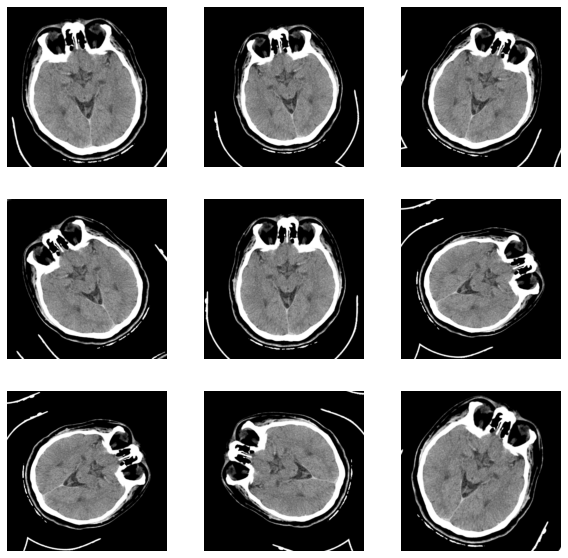

In [41]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')


In [42]:
IMG_SIZE = (512, 512)
IMG_SHAPE = IMG_SIZE + (3,)
print(IMG_SHAPE)

(512, 512, 3)


c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [44]:
es = tf.keras.callbacks.EarlyStopping(patience=5)
chkpt = tf.keras.callbacks.ModelCheckpoint(filepath='.\\models\\best_vggmodel.h5', save_best_only=True, save_weights_only=True)

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset,
                 callbacks=[es,chkpt])

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/10
318/318 [==============================] - 231s 721ms/step - loss: 0.9255 - accuracy: 0.5579 - val_loss: 1.1629 - val_accuracy: 0.4929
Epoch 2/10
318/318 [==============================] - 231s 727ms/step - loss: 0.8328 - accuracy: 0.5870 - val_loss: 1.0669 - val_accuracy: 0.5143
Epoch 3/10
318/318 [==============================] - 232s 729ms/step - loss: 0.7680 - accuracy: 0.6109 - val_loss: 1.0050 - val_accuracy: 0.5357
Epoch 4/10
318/318 [==============================] - 232s 728ms/step - loss: 0.7062 - accuracy: 0.6344 - val_loss: 0.9759 - val_accuracy: 0.5571
Epoch 5/10
318/318 [==============================] - 232s 730ms/step - loss: 0.6815 - accuracy: 0.6521 - val_loss: 0.9064 - val_accuracy: 0.5714
Epoch 6/10
318/318 [==============================] - 232s 729ms/step - loss: 0.6410 - accuracy: 0.6723 - val_loss: 0.8257 - val_accuracy: 0.6214
Epoch 7/10
318/318 [==============================] - 233s 731ms/step - loss: 0.6284 - accuracy: 0.6765 - val_loss: 0.8202 -

In [46]:
loss0, accuracy0 = model.evaluate(test_dataset)

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7/7 [==============================] - 5s 699ms/step - loss: 0.6716 - accuracy: 0.7071


In [58]:
pretrained_model.trainable = True
fine_tune_at = 9
for layer in pretrained_model.layers[:fine_tune_at]:
 layer.trainable = False

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate/10),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [61]:
history_fine = model.fit(train_dataset,
                        epochs=20,
                        initial_epoch=history.epoch[-1],
                        validation_data=validation_dataset,
                        callbacks = [chkpt,es])

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 10/20
318/318 [==============================] - 374s 1s/step - loss: 0.3842 - accuracy: 0.8258 - val_loss: 0.3718 - val_accuracy: 0.8643
Epoch 11/20
318/318 [==============================] - 377s 1s/step - loss: 0.2808 - accuracy: 0.8851 - val_loss: 0.3504 - val_accuracy: 0.8643
Epoch 12/20
318/318 [==============================] - 378s 1s/step - loss: 0.2412 - accuracy: 0.8980 - val_loss: 0.3615 - val_accuracy: 0.8786
Epoch 13/20
318/318 [==============================] - 378s 1s/step - loss: 0.2146 - accuracy: 0.9139 - val_loss: 0.4187 - val_accuracy: 0.8571
Epoch 14/20
318/318 [==============================] - 378s 1s/step - loss: 0.2048 - accuracy: 0.9205 - val_loss: 0.3259 - val_accuracy: 0.8857
Epoch 15/20
318/318 [==============================] - 377s 1s/step - loss: 0.1764 - accuracy: 0.9311 - val_loss: 0.2471 - val_accuracy: 0.9214
Epoch 16/20
318/318 [==============================] - 377s 1s/step - loss: 0.1532 - accuracy: 0.9435 - val_loss: 0.2636 - val_accuracy:

In [62]:
loss0, accuracy0 = model.evaluate(test_dataset)
loss0, accuracy0 = model.evaluate(validation_dataset)


c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7/7 [==============================] - 5s 633ms/step - loss: 0.2605 - accuracy: 0.9143


In [63]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

test_data = test_dataset.take(10)
score = 0
photo_amount = 0
for photo in test_data:
    pred_list = model.predict(photo[0])
    for i, pred in enumerate(pred_list):
        photo_amount += 1
        pred = np.round(sigmoid(pred))
        label = photo[1][i]
        if pred == label:
            score += 1
print(score)
print(photo_amount)
print(score/photo_amount)

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


128
140
0.9142857142857143


In [64]:
y_true = test_generator.classes
y_test_probabilities = model.predict(test_generator,  verbose=1)
y_pred = np.round(y_test_probabilities)
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7/7 [==============================] - 21s 644ms/step
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.39      0.20      0.26        70
         1.0       0.00      0.00      0.00        70

    accuracy                           0.10       140
   macro avg       0.13      0.07      0.09       140
weighted avg       0.19      0.10      0.13       140



c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

In [68]:
model.save('./models/teknofestvggnet.h5')

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
import cv2
img = cv2.imread('../Deneme1/data/archive/chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

img = cv2.resize(img, (224,224))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype(np.float32)/255.
img=np.expand_dims( img,axis=0 )

preds = model.predict(img)
y_classes = np.round(preds)
print(y_classes)

c:\Users\ardab\Desktop\Coding\Teknofest\Semantic Seg\venv\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-4g0fenxj\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
